In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("train.csv")

In [9]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
df.drop("id", axis =1, inplace=True)

In [12]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [13]:
#distribution 
df_Stat=df[['label', 'tweet']].groupby('label').count().reset_index()
df_Stat.columns=['lable','count']
df_Stat['percentge']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,lable,count,percentge
0,0,29720,92.98542
1,1,2242,7.01458


In [17]:
df['length'] = df['tweet'].apply(len)
df.head(10)

,label,tweet,lenght,length
0,0,@user when a father is dysfunctional and is s...,102,102
1,0,@user @user thanks for #lyft credit i can't us...,122,122
2,0,bihday your majesty,21,21
3,0,#model i love u take with u all the time in ...,86,86
4,0,factsguide: society now #motivation,39,39
5,0,[2/2] huge fan fare and big talking before the...,116,116
6,0,@user camping tomorrow @user @user @user @use...,74,74
7,0,the next school year is the year for exams.ð...,143,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87,87
9,0,@user @user welcome here ! i'm it's so #gr...,50,50


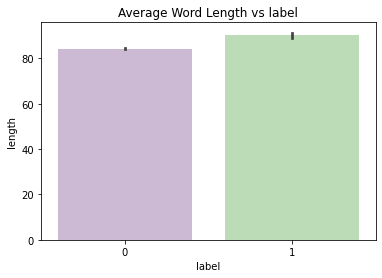

In [18]:
sns.barplot('label','length',data = df,palette='PRGn')
plt.title('Average Word Length vs label')
plt.show()

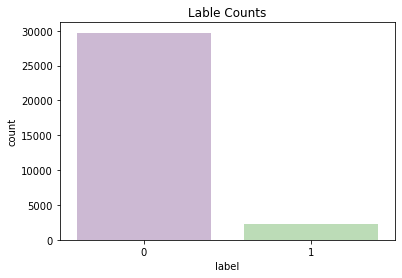

In [19]:
sns.countplot(x='label',data=df, palette="PRGn")
plt.title('Lable Counts')
plt.show()

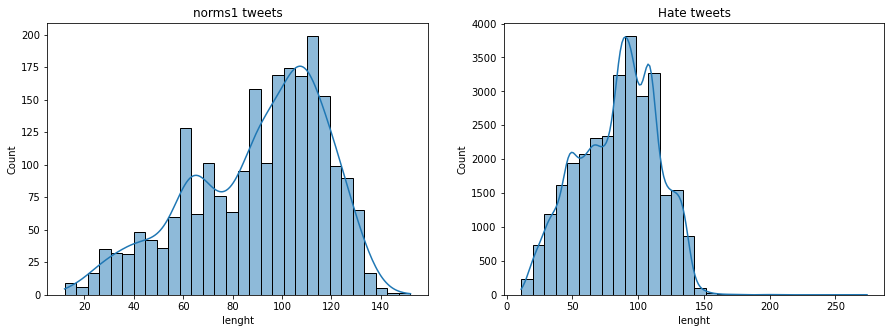

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df[df["label"] == 1]["lenght"], bins = 30,ax=ax1, kde=True).set(title = "norms1 tweets")
sns.histplot(df[df["label"]==0]["lenght"], bins = 30,ax =ax2, kde=True).set(title = "Hate tweets")
plt.show()

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Chhota
[nltk_data]     DON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def process_tweet(tweet):
    tweet =  " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())
    tweet = nltk.word_tokenize(tweet)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in tweet]
    words = [word for word in stem if word not in stopwords.words('english')]
    tweet = " ".join(words)
    return tweet

df["clean_tweet"] = df["tweet"].apply(process_tweet)
df.head()

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df.clean_tweet)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for all words")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer